<a href="https://colab.research.google.com/github/eulucas/thEconomist/blob/main/thEconomist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalando o 'Yahoo! Finance market data downloader'

In [ ]:
!pip install -q yfinance

     |████████████████████████████████| 6.3 MB 6.2 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data # -> Usada para carregar os dados financeiros online
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # -> Usada para criar gráficos interativos
import yfinance as yf

Montando a Base com as Ações

In [ ]:
acoes = ['ABEV3.SA','B3SA3.SA','BBAS3.SA','CSAN3.SA','EGIE3.SA','ITSA4.SA','LREN3.SA','SLCE3.SA','SULA11.SA','OIBR3.SA','AMAR3.SA']

In [ ]:
acoes_df = pd.DataFrame()
for acao in acoes:
  acoes_df[acao] = yf.download(acao, start='2015-01-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
acoes_df

,ABEV3.SA,B3SA3.SA,BBAS3.SA,CSAN3.SA,EGIE3.SA,ITSA4.SA,LREN3.SA,SLCE3.SA,SULA11.SA,OIBR3.SA,AMAR3.SA
Date,,,,,,,,,,,
2015-01-02,16.020000,3.170000,22.650000,6.950000,26.087999,6.828494,12.545454,6.800000,9.729705,6.753943,13.190909
2015-01-05,15.730000,3.083333,22.180000,6.537500,26.120001,6.850834,12.196694,6.800000,9.529670,6.268853,13.090909
2015-01-06,16.330000,3.113333,22.490000,6.280000,26.648001,6.902959,12.337190,6.880000,9.297629,5.373302,12.281818
2015-01-07,16.559999,3.236666,23.480000,6.372500,27.320000,7.163589,12.547107,7.100000,9.273625,5.283747,12.509090
2015-01-08,16.540001,3.193333,23.559999,6.450000,27.600000,7.238055,12.561983,7.120000,9.137601,5.335988,12.372727
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13,16.350000,14.200000,29.629999,22.620001,39.099998,11.130000,37.169998,44.360001,29.580000,1.020000,6.200000
2021-09-14,16.440001,14.130000,29.230000,23.500000,39.279999,11.060000,37.380001,44.040001,29.660000,1.010000,6.130000
2021-09-15,16.020000,14.050000,29.000000,23.549999,38.860001,11.060000,36.790001,44.119999,28.459999,1.010000,5.990000


Renomear as Ações para ficar mais acessível

In [ ]:
acoes_df = acoes_df.rename(columns={'ABEV3.SA': 'AMBEV', 'B3SA3.SA': 'B3', 'BBAS3.SA': 'BB', 'CSAN3.SA': 'COSAN', 'EGIE3.SA': 'ENGIE',
                                    'ITSA4.SA': 'ITAUSA', 'LREN3.SA': 'RENNER', 'SLCE3.SA': 'SLC', 'SULA11.SA': 'SUL', 'OIBR3.SA': 'OI',
                                    'AMAR3.SA': 'MARISA'})

In [ ]:
acoes_df

,AMBEV,B3,BB,COSAN,ENGIE,ITAUSA,RENNER,SLC,SUL,OI,MARISA
Date,,,,,,,,,,,
2015-01-02,16.020000,3.170000,22.650000,6.950000,26.087999,6.828494,12.545454,6.800000,9.729705,6.753943,13.190909
2015-01-05,15.730000,3.083333,22.180000,6.537500,26.120001,6.850834,12.196694,6.800000,9.529670,6.268853,13.090909
2015-01-06,16.330000,3.113333,22.490000,6.280000,26.648001,6.902959,12.337190,6.880000,9.297629,5.373302,12.281818
2015-01-07,16.559999,3.236666,23.480000,6.372500,27.320000,7.163589,12.547107,7.100000,9.273625,5.283747,12.509090
2015-01-08,16.540001,3.193333,23.559999,6.450000,27.600000,7.238055,12.561983,7.120000,9.137601,5.335988,12.372727
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13,16.350000,14.200000,29.629999,22.620001,39.099998,11.130000,37.169998,44.360001,29.580000,1.020000,6.200000
2021-09-14,16.440001,14.130000,29.230000,23.500000,39.279999,11.060000,37.380001,44.040001,29.660000,1.010000,6.130000
2021-09-15,16.020000,14.050000,29.000000,23.549999,38.860001,11.060000,36.790001,44.119999,28.459999,1.010000,5.990000


Verificar se há algum valor NULL

In [ ]:
acoes_df.isnull().sum()

AMBEV     0
B3        0
BB        0
COSAN     0
ENGIE     0
ITAUSA    0
RENNER    0
SLC       0
SUL       0
OI        1
MARISA    0
dtype: int64

Como podemos verificar acima há um valor nulo na 'OI', então iremos removê-lo

In [ ]:
acoes_df.shape

(1664, 11)

In [ ]:
acoes_df.dropna(inplace=True)

In [ ]:
acoes_df.shape #-> Notamos abaixo que foi apagado o valor nulo

(1663, 11)

In [ ]:
acoes_df.isnull().sum()

AMBEV     0
B3        0
BB        0
COSAN     0
ENGIE     0
ITAUSA    0
RENNER    0
SLC       0
SUL       0
OI        0
MARISA    0
dtype: int64

Coneverter os Dados em CSV

In [ ]:
acoes_df.to_csv('acoes.csv')

In [ ]:
acoes_df = pd.read_csv('acoes.csv')
acoes_df

,Date,AMBEV,B3,BB,COSAN,ENGIE,ITAUSA,RENNER,SLC,SUL,OI,MARISA
0,2015-01-02,16.020000,3.170000,22.650000,6.950000,26.087999,6.828494,12.545454,6.800000,9.729705,6.753943,13.190909
1,2015-01-05,15.730000,3.083333,22.180000,6.537500,26.120001,6.850834,12.196694,6.800000,9.529670,6.268853,13.090909
2,2015-01-06,16.330000,3.113333,22.490000,6.280000,26.648001,6.902959,12.337190,6.880000,9.297629,5.373302,12.281818
3,2015-01-07,16.559999,3.236666,23.480000,6.372500,27.320000,7.163589,12.547107,7.100000,9.273625,5.283747,12.509090
4,2015-01-08,16.540001,3.193333,23.559999,6.450000,27.600000,7.238055,12.561983,7.120000,9.137601,5.335988,12.372727
...,...,...,...,...,...,...,...,...,...,...,...,...
1658,2021-09-13,16.350000,14.200000,29.629999,22.620001,39.099998,11.130000,37.169998,44.360001,29.580000,1.020000,6.200000
1659,2021-09-14,16.440001,14.130000,29.230000,23.500000,39.279999,11.060000,37.380001,44.040001,29.660000,1.010000,6.130000
1660,2021-09-15,16.020000,14.050000,29.000000,23.549999,38.860001,11.060000,36.790001,44.119999,28.459999,1.010000,5.990000
1661,2021-09-16,16.129999,14.120000,29.469999,23.650000,38.900002,11.120000,37.250000,44.340000,28.120001,0.980000,5.790000


Consultar Colunas

In [ ]:
acoes_df.columns[1:] # -> Conta a partir da coluna 1 pois a 0 é coluna DATA e ela é´uma referência

Index(['AMBEV', 'B3', 'BB', 'COSAN', 'ENGIE', 'ITAUSA', 'RENNER', 'SLC', 'SUL',
       'OI', 'MARISA'],
      dtype='object')

In [ ]:
acoes_df.describe()

,AMBEV,B3,BB,COSAN,ENGIE,ITAUSA,RENNER,SLC,SUL,OI,MARISA
count,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000
mean,17.880541,9.906795,32.223842,11.914707,34.585294,9.636975,31.369101,18.587192,24.827308,2.192395,7.563262
std,2.413217,5.321639,10.314467,5.397460,7.466930,2.259498,12.202688,11.542837,12.418545,1.105075,2.309027
min,11.030000,2.990000,12.700000,4.412500,23.799999,5.155965,11.652892,6.690000,8.857552,0.440000,3.750000
25%,16.690001,5.753333,24.600000,8.373750,28.384001,7.757757,19.669420,8.612500,14.794593,1.430000,6.050000
50%,18.260000,7.980000,31.160000,9.750000,30.736000,9.680000,31.209089,17.570000,19.344667,1.960000,7.170000
75%,19.209999,14.755000,37.680000,15.042500,41.949999,11.510000,41.376818,24.430000,34.406271,2.850835,8.350000
max,24.270000,22.466665,55.180000,27.200001,54.099998,14.350000,60.869999,56.490002,62.032520,6.753943,15.280000


In [ ]:
acoes_df['B3'].describe()

count    1663.000000
mean        9.906795
std         5.321639
min         2.990000
25%         5.753333
50%         7.980000
75%        14.755000
max        22.466665
Name: B3, dtype: float64

Visualização Histograma

In [ ]:
len(acoes_df.columns)

12

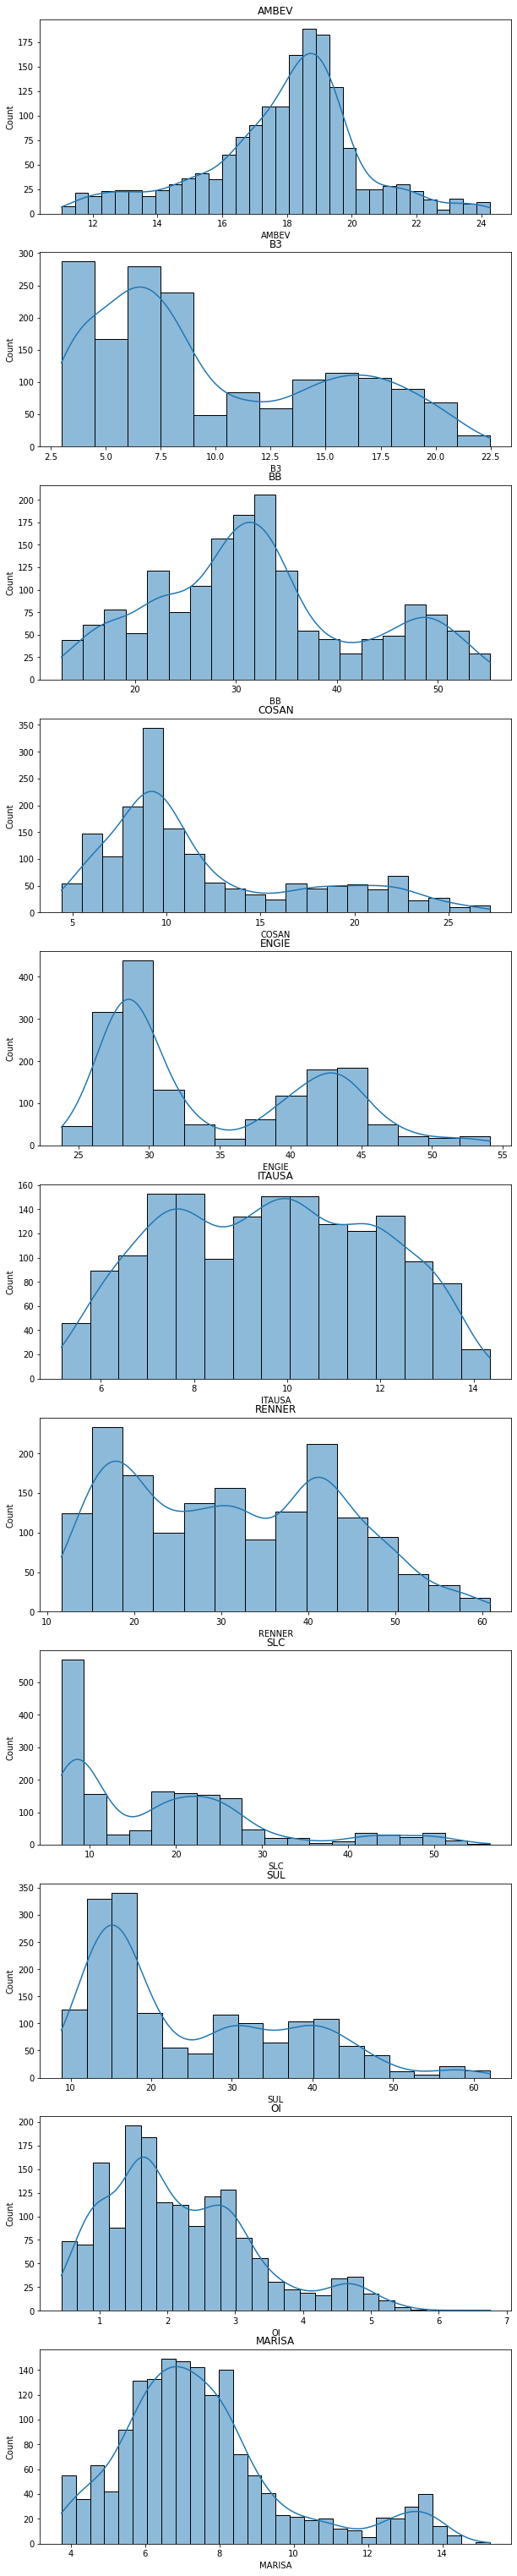

In [ ]:
plt.figure(figsize=(10, 60))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(12, 1, i + 1)
  sns.histplot(acoes_df[acoes_df.columns[i]], kde = True)
  plt.title(acoes_df.columns[i])

Visalização Boxplot

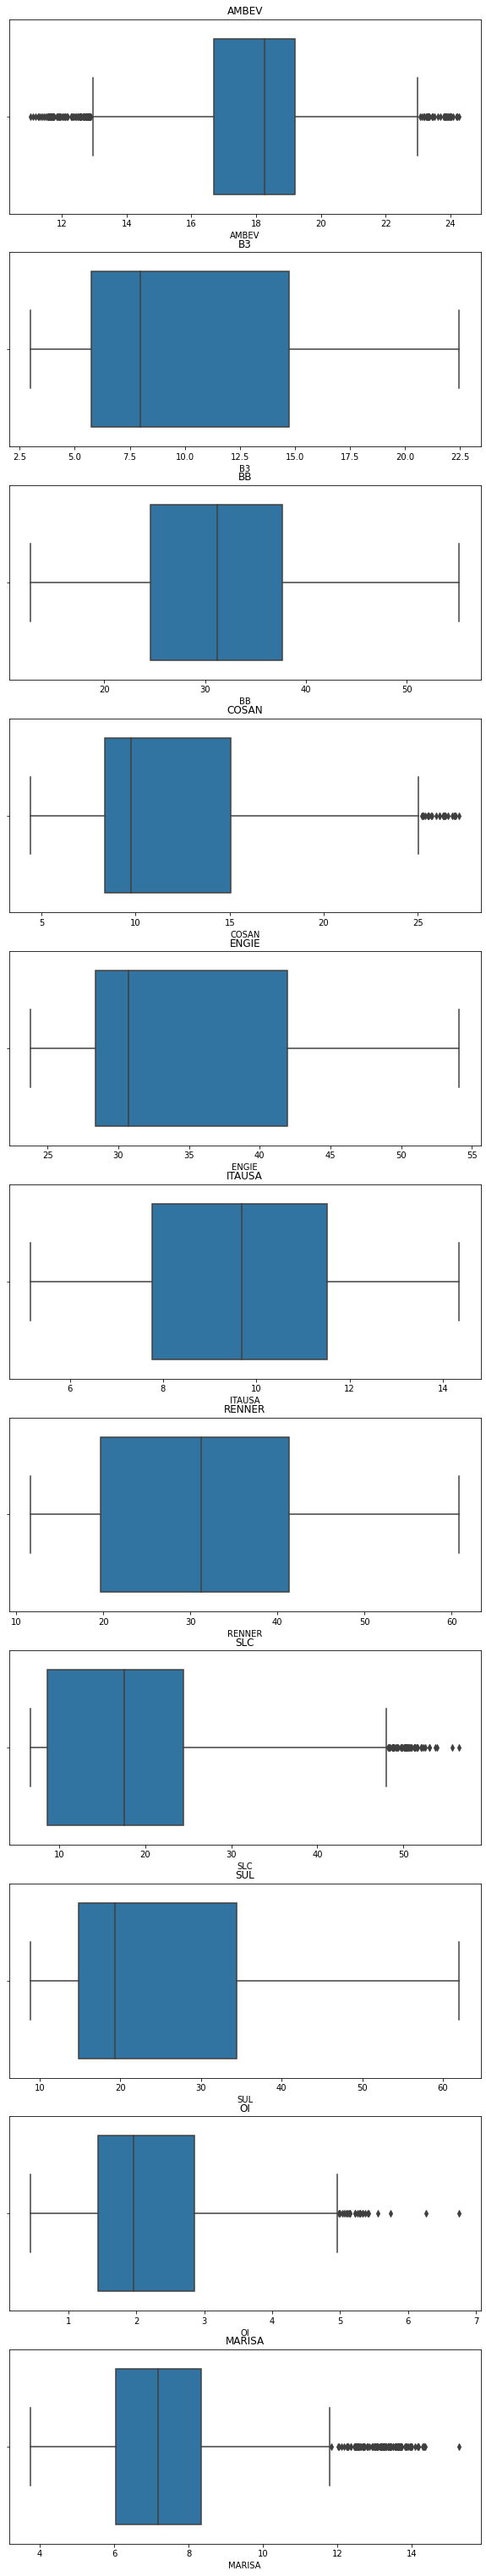

In [ ]:
plt.figure(figsize=(10, 60))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(12, 1, i + 1)
  sns.boxplot(x = acoes_df[acoes_df.columns[i]])
  plt.title(acoes_df.columns[i])

Visualização Linhas

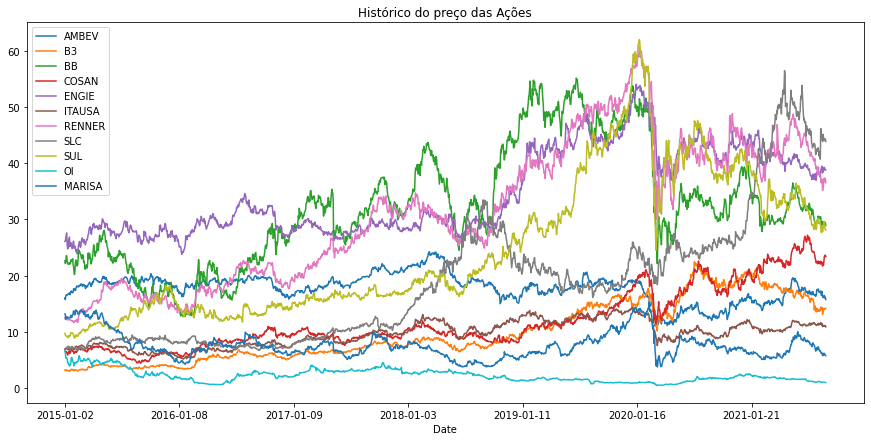

In [ ]:
acoes_df.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das Ações');

In [ ]:
acoes_df_tratado = acoes_df.copy()
for i in acoes_df_tratado.columns[1:]:
  acoes_df_tratado[i] = acoes_df_tratado[i] / acoes_df_tratado[i][0]

In [ ]:
acoes_df_tratado

,Date,AMBEV,B3,BB,COSAN,ENGIE,ITAUSA,RENNER,SLC,SUL,OI,MARISA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.981898,0.972660,0.979249,0.940647,1.001227,1.003272,0.972200,1.000000,0.979441,0.928177,0.992419
2,2015-01-06,1.019351,0.982124,0.992936,0.903597,1.021466,1.010905,0.983399,1.011765,0.955592,0.795580,0.931082
3,2015-01-07,1.033708,1.021030,1.036645,0.916906,1.047225,1.049073,1.000132,1.044118,0.953125,0.782320,0.948311
4,2015-01-08,1.032459,1.007361,1.040177,0.928058,1.057958,1.059978,1.001318,1.047059,0.939145,0.790055,0.937974
...,...,...,...,...,...,...,...,...,...,...,...,...
1658,2021-09-13,1.020599,4.479495,1.308168,3.254676,1.498773,1.629935,2.962826,6.523529,3.040174,0.151023,0.470021
1659,2021-09-14,1.026217,4.457413,1.290508,3.381295,1.505673,1.619684,2.979565,6.476471,3.048397,0.149542,0.464714
1660,2021-09-15,1.000000,4.432177,1.280353,3.388489,1.489574,1.619684,2.932536,6.488235,2.925063,0.149542,0.454101
1661,2021-09-16,1.006866,4.454259,1.301104,3.402878,1.491107,1.628470,2.969203,6.520588,2.890119,0.145100,0.438939


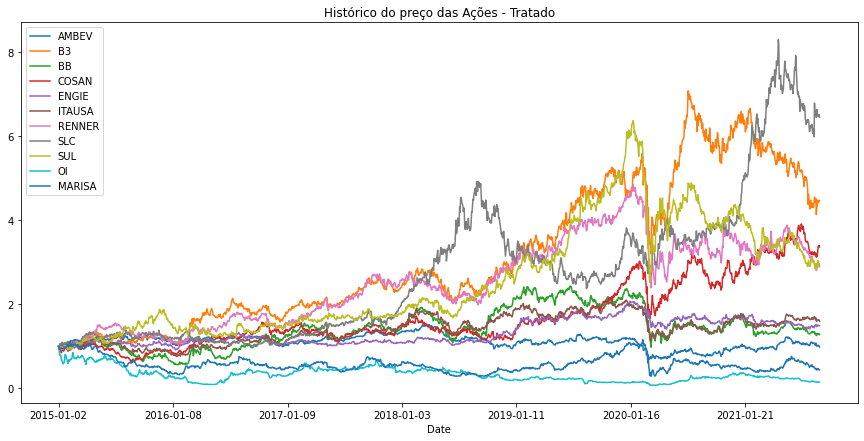

In [ ]:
acoes_df_tratado.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das Ações - Tratado');

Visualização Gráfico de linhas interativo

In [ ]:
figura = px.line(title = 'Histórico do Preço das Ações')
for i in acoes_df.columns[1:]:
  figura.add_scatter(x = acoes_df['Date'], y = acoes_df[i], name = i)
figura.show()

In [ ]:
figura = px.line(title = 'Histórico do Preço das Ações - Tratado')
for i in acoes_df_tratado.columns[1:]:
  figura.add_scatter(x = acoes_df_tratado['Date'], y = acoes_df_tratado[i], name = i)
figura.show()